In [41]:
# Nelder-Mead simplex algorithm is a class of graident-free module
import optimizer.gradient_free

In [42]:
# import objective functions for the test of optimizer 
import objective.test_optimizer

In [43]:
import matplotlib.pyplot as plt
import numpy as np

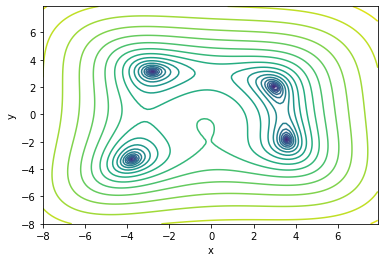

In [44]:
# Test 1: 
# Initialize the test objective function: Himmelblau
# This objective function is a mandatory for optimizer: 

# test Himmelblau function: 4 local minimum 
# minima 1: x= 3.0,        y=2.0 
# minima 2: x= -2.805118,  y=3.131312 
# minima 3: x= -3.779310,  y=-3.283186
# minima 4: x= 3.584428,   y= -1.848126 

x = [-8,8,0.15]  # start, end, step

y =[-8,8,0.15] # start, end, step

Himmelblau_test_obj = objective.test_optimizer.Himmelblau(x,y)  
# visualize the solution space
Himmelblau_test_obj.visualize()

In [45]:
# Initialize the Himmelblau optimizer: 
# input: 
    # 1. input parameter files containing: guess parameters,fix and fitted parameter, constraints ... 
    # 2. objective function: it must have "optimize" attribute, since objective functino will be evaluated as f_obj.optimize(current_parameters)
    # 3. lines to be skipped in the input file
    
optimize_Himmelblau = optimizer.gradient_free.NelderMeadSimplex("in_himmelblau","himmelblau.log",Himmelblau_test_obj,skipped=0)


In [46]:
text_file = open("in_himmelblau")
file_content = text_file.read()
print(file_content)
text_file.close()


# output frequency: current best parameters/obj, restart simplex  

2 2 

# guess parameters of Himmelblau function  

Himmelblau -2.3 1   

# fit (1) and fix (0) parameters: 

1 1 

# constraints (index lower upper)  ... ): 

None

# set termination criterion: max number of iteration, tolerance for parameters,tolerance for objective 

4000 1e-6 1e-6 

# create (Perturb) or use existing vertices (Restart): 

Nelder-Mead Perturb random 1.0 

 



In [47]:
# Run the optimization: 
# output all vertices for every:

optimize_Himmelblau.run_optimization()

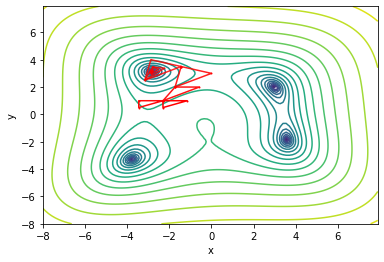

In [48]:
# read the output vertices
# the dump frequency is 2: For every 2 iteration, write out the vertices 

for i in range(0,20,2):  

    vertices = np.loadtxt("simplex_%d.txt"%i)

    # plot the simplex at every step
    plt.scatter(vertices[:,0],vertices[:,1],s=1,color="r",alpha=1-0.02*i) 

    plt.plot(vertices[:4,0],vertices[:4,1],color="r",alpha=1-0.02*i) 

# plot the contour plot Z(x,y)    
plt.xlabel("x")
plt.ylabel("y")
plt.contour(Himmelblau_test_obj.x_limit,Himmelblau_test_obj.y_limit,np.transpose(Himmelblau_test_obj.z_mat),20)   
plt.show()